# Assignment 4

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

##  Read in Data and Display First 5 Rows

In [2]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Display Data Types

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Drop and Rearrange Columns

In [4]:
titanic_df = titanic_df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Survived"]]
titanic_df.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0
5,3,male,NaN,0,0,8.4583,0
6,1,male,54.0,0,0,51.8625,0
7,3,male,2.0,3,1,21.0750,0
8,3,female,27.0,0,2,11.1333,1
9,2,female,14.0,1,0,30.0708,1


## Adjust Sex Column

In [5]:
titanic_df["Sex"] = titanic_df["Sex"].replace(['female','male'],[0,1])

## Redisplay First 5 Rows

In [6]:
titanic_df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


## Redisplay Data Types

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


## Create "Survived" Bar Chart

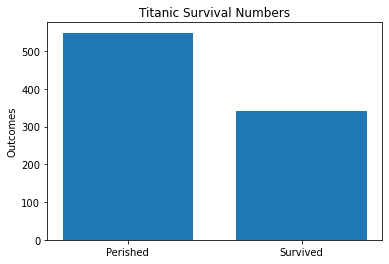

In [8]:
#Total = titanic_df['Survived'].sum()
#print (Total)
plt.bar(x=[0,1], height=titanic_df['Survived'].value_counts(), width = .75)
plt.xticks([0,1],("Perished", 'Survived'))

plt.ylabel('Outcomes')
plt.title('Titanic Survival Numbers')

plt.show()

## Feature Means

In [9]:
titanic_df.mean()

Pclass       2.308642
Sex          0.647587
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
Survived     0.383838
dtype: float64

## Feature Means Grouped By Outcome

In [10]:
titanic_df.groupby(titanic_df['Survived']).mean()

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408


 ## Averages Line Graph Based on Survival

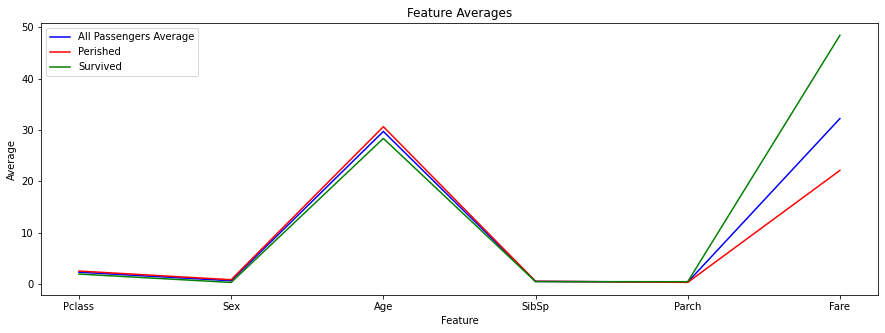

In [11]:
#figsize is width, height
plt.figure(figsize=(15,5))
#plot (x, y)

titanic_dfX = titanic_df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]
plt.plot(titanic_dfX.columns,titanic_dfX.mean() ,'m',color='blue', label="All Passengers Average")



fM = titanic_df.groupby(titanic_df['Survived']).mean()
plt.plot(titanic_dfX.columns,(fM["Pclass"][0],fM["Sex"][0],fM["Age"][0],fM["SibSp"][0],fM["Parch"][0],fM["Fare"][0]) ,'m', color='red', label="Perished")
plt.plot(titanic_dfX.columns,(fM["Pclass"][1],fM["Sex"][1],fM["Age"][1],fM["SibSp"][1],fM["Parch"][1],fM["Fare"][1]) ,'m', color='green', label="Survived")

#see documention for more info: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.title("Feature Averages")
plt.xlabel("Feature")
plt.ylabel("Average")
plt.legend()
plt.show()

## Feature Averages Bar Charts Based on Survival

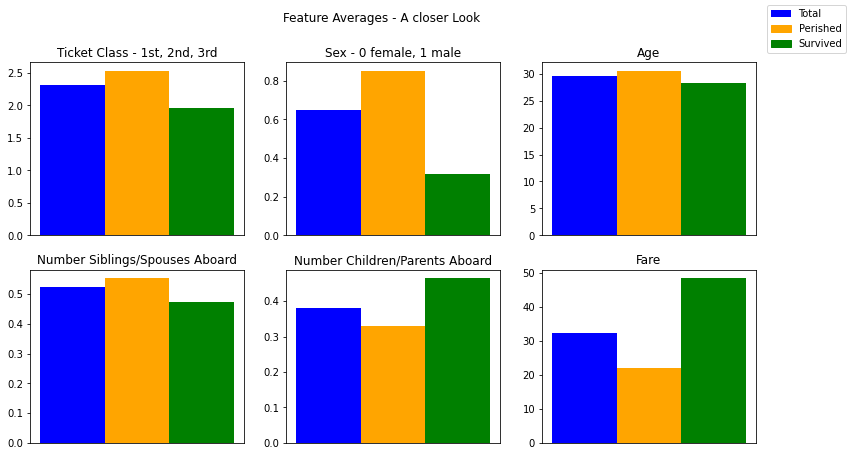

In [12]:
x = ["Total", "Perished", "Survived"]
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(13,7))
ax[0,0].bar(x,color = ['blue','orange','green'], height = (titanic_df["Pclass"].mean(), fM["Pclass"][0],fM["Pclass"][1]), width = 1)
ax[0,0].title.set_text("Ticket Class - 1st, 2nd, 3rd")
ax[0,1].bar(x,color = ['blue','orange','green'], height = (titanic_df["Sex"].mean(), fM["Sex"][0],fM["Sex"][1]), width = 1)
ax[0,1].title.set_text("Sex - 0 female, 1 male")
ax[0,2].bar(x,color = ['blue','orange','green'], height = (titanic_df["Age"].mean(), fM["Age"][0],fM["Age"][1]), width = 1)
ax[0,2].title.set_text("Age")
ax[1,0].bar(x,color = ['blue','orange','green'], height = (titanic_df["SibSp"].mean(), fM["SibSp"][0],fM["SibSp"][1]), width = 1)
ax[1,0].title.set_text("Number Siblings/Spouses Aboard")
ax[1,1].bar(x,color = ['blue','orange','green'], height = (titanic_df["Parch"].mean(), fM["Parch"][0],fM["Parch"][1]), width = 1)
ax[1,1].title.set_text("Number Children/Parents Aboard")
ax[1,2].bar(x,color = ['blue','orange','green'], height = (titanic_df["Fare"].mean(), fM["Fare"][0],fM["Fare"][1]), width = 1)
ax[1,2].title.set_text("Fare")
for i in (0, 1):
    for j in (0, 1, 2):
        ax[i,j].tick_params(
            axis='x',        
            bottom=False,      
            labelbottom=False
        )
fig.suptitle("Feature Averages - A closer Look")
lege = fig.legend(x)
lege.legendHandles[1].set_color('orange')
lege.legendHandles[2].set_color('green')

## Age and Fare Scatter Plot

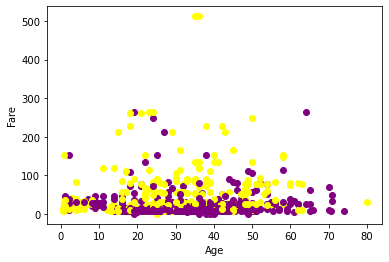

In [13]:
Surv = titanic_df['Survived']
Age = titanic_df['Age']
Fare = titanic_df['Fare']
for i in range (Surv.size):
    if Surv[i] == 0:
        plt.scatter(Age[i],Fare[i], color = 'purple')
    else:
        plt.scatter(Age[i],Fare[i], color = 'yellow')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()